In [1]:
import pandas_datareader.data as web

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Getting the Data
start = datetime.datetime(2015, 8, 7)

end = datetime.datetime(2021, 7, 19)

In [4]:
# try 'yahoo' if Google doesn't work. make sure to check the website mentioned above
# search QA forums if you have any issues on this, many questions have already been answered there!
BTC = web.DataReader("BTC-USD", 'yahoo', start, end)

In [5]:
BTC.drop(columns = 'Adj Close', inplace = True)
BTC.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0


In [6]:
ETH = web.DataReader("ETH-USD", 'yahoo', start, end)

In [7]:
ETH.drop(columns = 'Adj Close', inplace = True)
ETH.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,164329.0
2015-08-07,2.798810,0.714725,2.793760,0.753325,674188.0
2015-08-08,0.879810,0.629191,0.706136,0.701897,532170.0
2015-08-09,0.729854,0.636546,0.713989,0.708448,405283.0
2015-08-10,1.131410,0.663235,0.708087,1.067860,1463100.0


In [8]:
LTC = web.DataReader("LTC-USD", 'yahoo', start, end)

In [9]:
LTC.drop(columns = 'Adj Close', inplace = True)
LTC.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-08-06,4.22069,3.97027,4.06334,4.20828,4192810.0
2015-08-07,4.22364,3.83542,4.22099,3.85475,4917730.0
2015-08-08,3.98426,3.81139,3.84339,3.89859,3064680.0
2015-08-09,3.98013,3.89761,3.90080,3.94888,2239890.0
2015-08-10,4.15955,3.94295,3.94874,4.15955,3426300.0


In [10]:
XRP = web.DataReader("XRP-USD", 'yahoo', start, end)

In [11]:
XRP.drop(columns = 'Adj Close', inplace = True)
XRP.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-08-06,0.008153,0.007989,0.008020,0.008152,363643.0
2015-08-07,0.008708,0.008164,0.008164,0.008476,678295.0
2015-08-08,0.008823,0.008472,0.008484,0.008808,531969.0
2015-08-09,0.008905,0.008746,0.008812,0.008750,472973.0
2015-08-10,0.008766,0.008591,0.008751,0.008591,282461.0


In [12]:
#Visualizing the Data

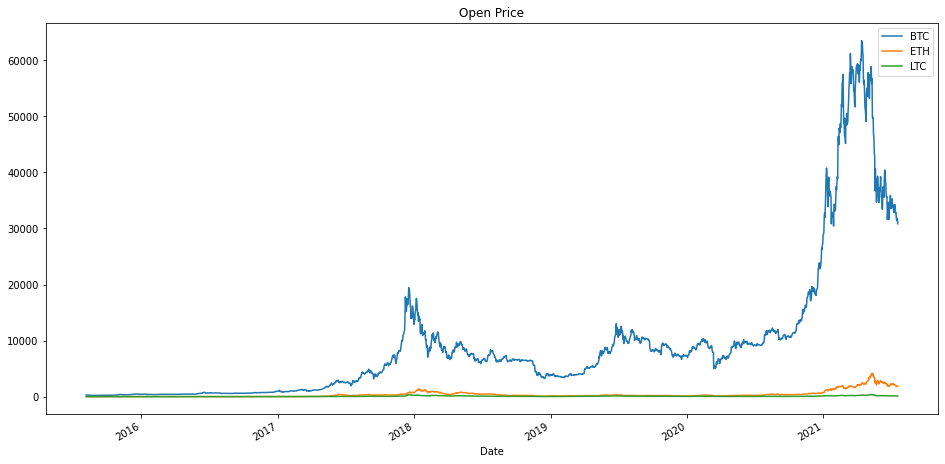

In [13]:
BTC['Open'].plot(label = 'BTC', figsize = (16,8), title = 'Open Price')
ETH['Open'].plot(label = 'ETH')
LTC['Open'].plot(label = 'LTC')
#XRP['Open'].plot(label='XRP')
plt.legend()

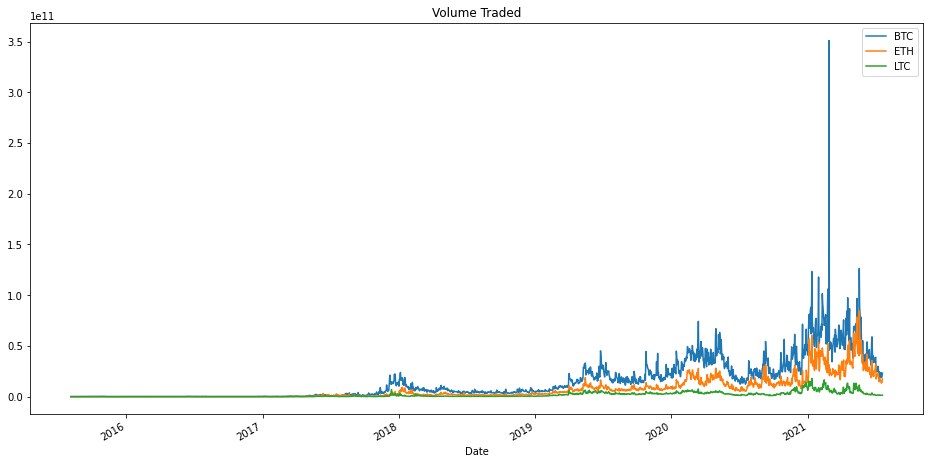

In [14]:
BTC['Volume'].plot(label = 'BTC', figsize = (16,8), title = 'Volume Traded')
ETH['Volume'].plot(label = 'ETH')
LTC['Volume'].plot(label = 'LTC')
#XRP['Volume'].plot(label='XRP')
plt.legend()

In [15]:
BTC['Volume'].idxmax()

Timestamp('2021-02-26 00:00:00')

In [16]:
BTC['Total Traded'] = BTC['Open']*BTC['Volume']
ETH['Total Traded'] = ETH['Open']*ETH['Volume']
LTC['Total Traded'] = LTC['Open']*LTC['Volume']
#XRP['Total Traded'] = XRP['Open']*XRP['Volume']

Text(0, 0.5, 'Total Traded')

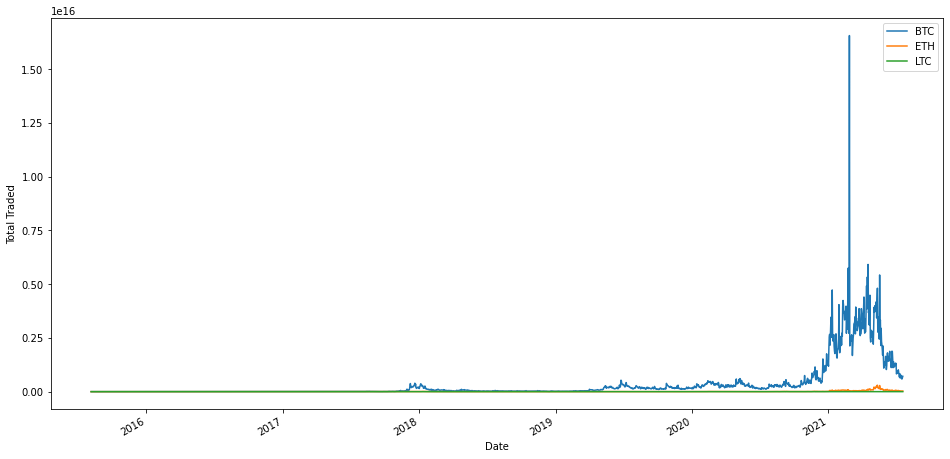

In [17]:
BTC['Total Traded'].plot(label = 'BTC', figsize = (16,8))
ETH['Total Traded'].plot(label = 'ETH')
LTC['Total Traded'].plot(label = 'LTC')
#XRP['Total Traded'].plot(label='XRP')
plt.legend()
plt.ylabel('Total Traded')

In [18]:
#What happened?
BTC['Total Traded'].idxmax()

Timestamp('2021-02-26 00:00:00')

<AxesSubplot:xlabel='Date'>

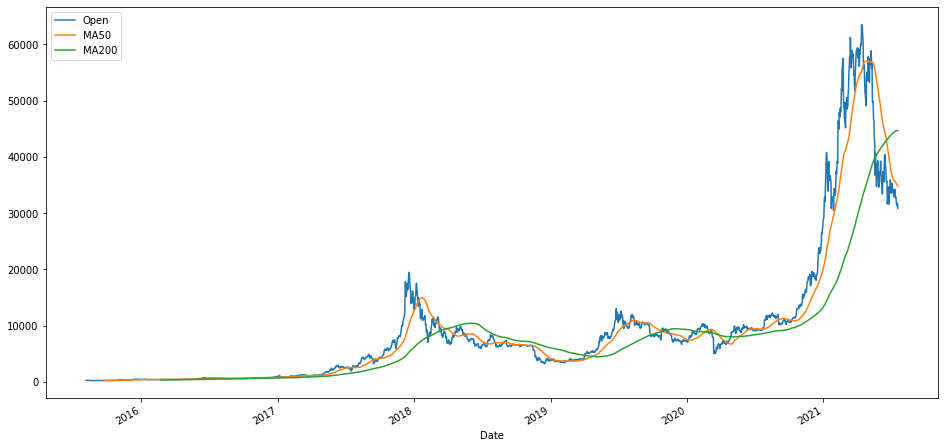

In [19]:
BTC['MA50'] = BTC['Open'].rolling(50).mean()
BTC['MA200'] = BTC['Open'].rolling(200).mean()
BTC[['Open', 'MA50', 'MA200']].plot(label = 'BTC', figsize = (16,8))

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
coins = pd.concat([BTC['Open'], ETH['Open'], LTC['Open']], axis = 1)

In [22]:
coins.columns = ['BTC Open', 'ETH Open', 'LTC Open']

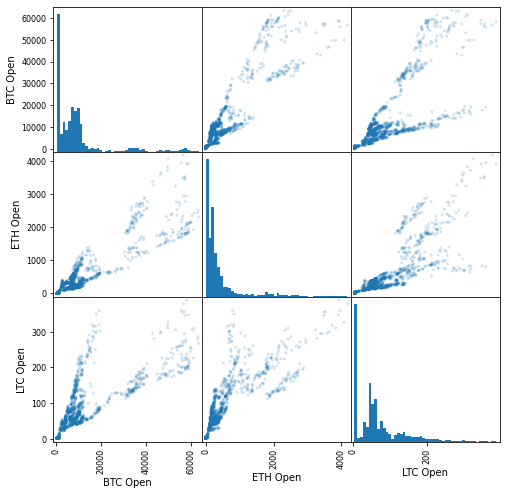

In [23]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(coins, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins':50});

In [24]:
#Create a CandleStick chart

/usr/local/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


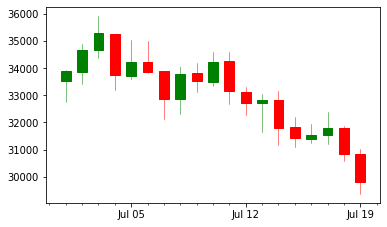

In [25]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
BTC_reset = BTC.loc['2021-07':'2021-07'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
BTC_reset['date_ax'] = BTC_reset['Date'].apply(lambda date: date2num(date))
BTC_values = [tuple(vals) for vals in BTC_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom = 0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, BTC_values, width = 0.6, colorup = 'g', colordown = 'r');

In [26]:
#Basic Financial Analysis

#Daily Percentage Change

In [27]:
BTC['returns'] = (BTC['Close'] / BTC['Close'].shift(1)) - 1

In [28]:
BTC.head()

,High,Low,Open,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0,1.184226e+10,NaN,NaN,NaN
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0,1.637414e+10,NaN,NaN,-0.066484
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0,6.211845e+09,NaN,NaN,0.015655
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0,5.569569e+09,NaN,NaN,-0.002313
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0,6.723248e+09,NaN,NaN,0.022369


In [29]:
BTC['returns'] = BTC['Close'].pct_change(1)
ETH['returns'] = ETH['Close'].pct_change(1)
LTC['returns'] = LTC['Close'].pct_change(1)

In [30]:
BTC.head()

,High,Low,Open,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0,1.184226e+10,NaN,NaN,NaN
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0,1.637414e+10,NaN,NaN,-0.066484
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0,6.211845e+09,NaN,NaN,0.015655
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0,5.569569e+09,NaN,NaN,-0.002313
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0,6.723248e+09,NaN,NaN,0.022369


In [31]:
ETH.head()

,High,Low,Open,Close,Volume,Total Traded,returns
Date,,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,164329.0,4.653173e+05,NaN
2015-08-07,2.798810,0.714725,2.793760,0.753325,674188.0,1.883520e+06,-0.728250
2015-08-08,0.879810,0.629191,0.706136,0.701897,532170.0,3.757844e+05,-0.068268
2015-08-09,0.729854,0.636546,0.713989,0.708448,405283.0,2.893676e+05,0.009333
2015-08-10,1.131410,0.663235,0.708087,1.067860,1463100.0,1.036002e+06,0.507323


In [32]:
LTC.head()

,High,Low,Open,Close,Volume,Total Traded,returns
Date,,,,,,,
2015-08-06,4.22069,3.97027,4.06334,4.20828,4192810.0,1.703681e+07,NaN
2015-08-07,4.22364,3.83542,4.22099,3.85475,4917730.0,2.075769e+07,-0.084008
2015-08-08,3.98426,3.81139,3.84339,3.89859,3064680.0,1.177876e+07,0.011373
2015-08-09,3.98013,3.89761,3.90080,3.94888,2239890.0,8.737363e+06,0.012900
2015-08-10,4.15955,3.94295,3.94874,4.15955,3426300.0,1.352957e+07,0.053349


<AxesSubplot:>

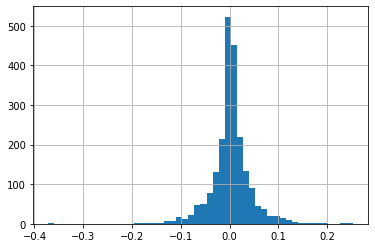

In [33]:
BTC['returns'].hist(bins=50)

<AxesSubplot:>

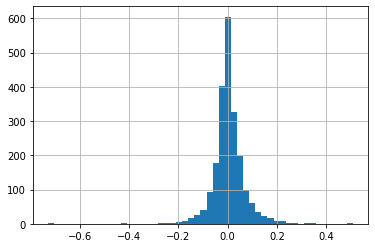

In [34]:
ETH['returns'].hist(bins=50)

<AxesSubplot:>

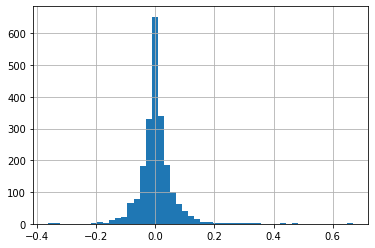

In [35]:
LTC['returns'].hist(bins=50)

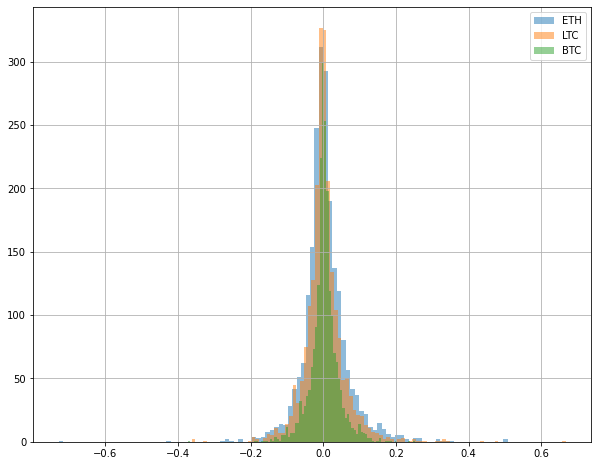

In [36]:
ETH['returns'].hist(bins = 100, label = 'ETH', figsize = (10, 8), alpha = 0.5)
LTC['returns'].hist(bins = 100, label = 'LTC', alpha = 0.5)
BTC['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5)
plt.legend()

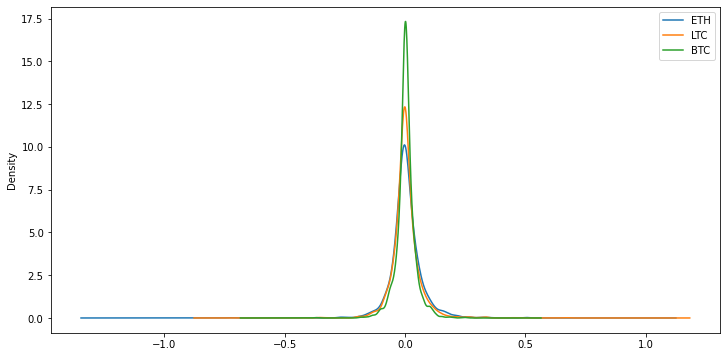

In [37]:
ETH['returns'].plot(kind = 'kde', label = 'ETH', figsize = (12, 6))
LTC['returns'].plot(kind = 'kde', label = 'LTC')
BTC['returns'].plot(kind = 'kde', label = 'BTC')
plt.legend()

<AxesSubplot:>

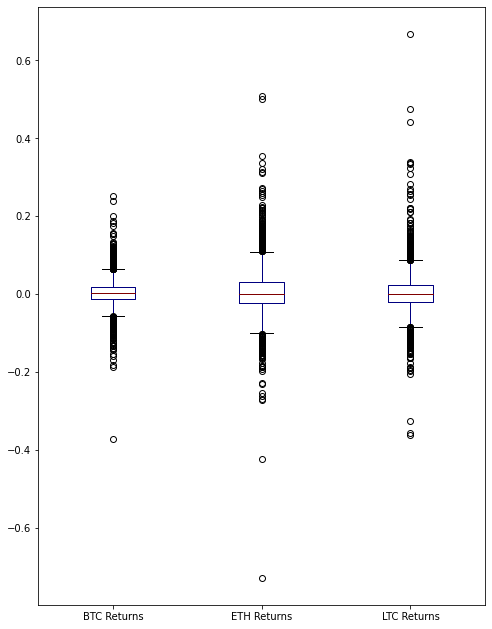

In [38]:
box_df = pd.concat([BTC['returns'], ETH['returns'], LTC['returns']], axis = 1)
box_df.columns = ['BTC Returns', 'ETH Returns', 'LTC Returns']
box_df.plot(kind = 'box', figsize = (8, 11), colormap = 'jet')

In [39]:
#Comparing Daily Returns between Stocks

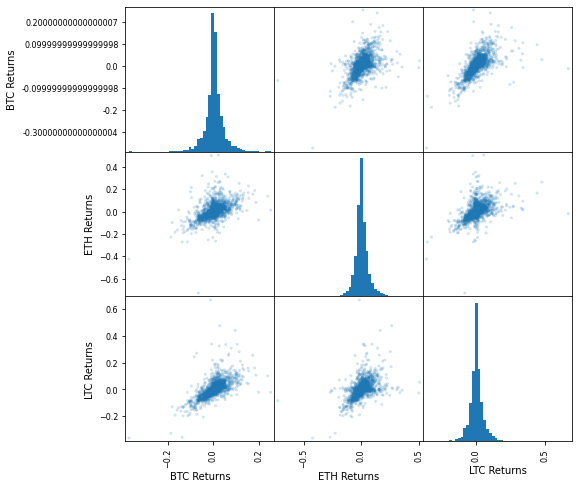

In [40]:
scatter_matrix(box_df, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins':50});

<AxesSubplot:xlabel='BTC Returns', ylabel='LTC Returns'>

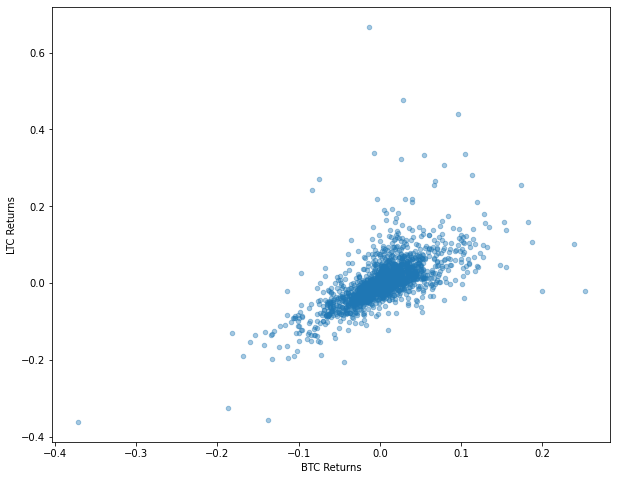

In [41]:
box_df.plot(kind = 'scatter', x = 'BTC Returns', y = 'LTC Returns', alpha = 0.4, figsize = (10, 8))

In [42]:
#Cumulative Daily Returns

In [43]:
BTC['Cumulative Return'] = (1 + BTC['returns']).cumprod()
ETH['Cumulative Return'] = (1 + ETH['returns']).cumprod()
LTC['Cumulative Return'] = (1 + LTC['returns']).cumprod()

In [44]:
BTC.head()

,High,Low,Open,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,42484800.0,1.184226e+10,NaN,NaN,NaN,NaN
2015-08-07,279.928009,260.709991,279.742004,260.997009,58533000.0,1.637414e+10,NaN,NaN,-0.066484,0.933516
2015-08-08,267.002991,260.467987,261.115997,265.083008,23789600.0,6.211845e+09,NaN,NaN,0.015655,0.948130
2015-08-09,267.032013,262.596008,265.477997,264.470001,20979400.0,5.569569e+09,NaN,NaN,-0.002313,0.945938
2015-08-10,270.385986,264.093994,264.342010,270.385986,25433900.0,6.723248e+09,NaN,NaN,0.022369,0.967098


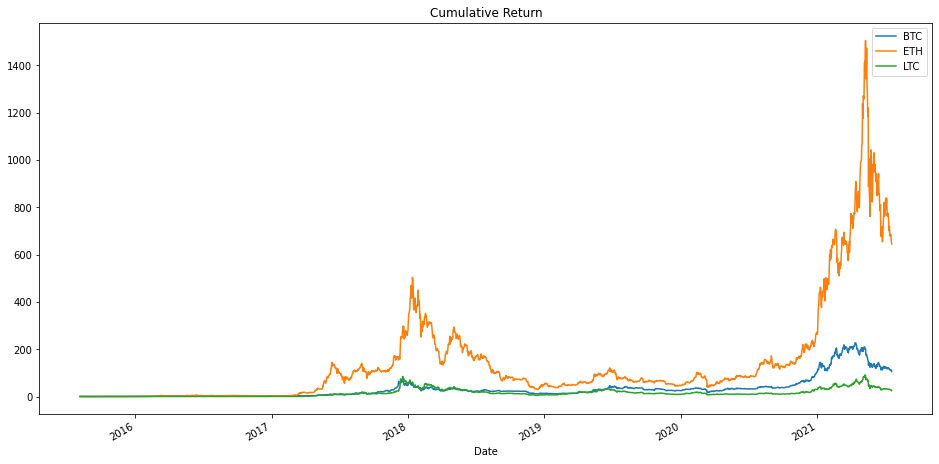

In [45]:
BTC['Cumulative Return'].plot(label = 'BTC', figsize = (16, 8), title = 'Cumulative Return')
ETH['Cumulative Return'].plot(label = 'ETH')
LTC['Cumulative Return'].plot(label = 'LTC')
plt.legend()

In [46]:
BTC

,High,Low,Open,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,
2015-08-06,280.391998,276.365997,278.740997,279.584991,4.248480e+07,1.184226e+10,NaN,NaN,NaN,NaN
2015-08-07,279.928009,260.709991,279.742004,260.997009,5.853300e+07,1.637414e+10,NaN,NaN,-0.066484,0.933516
2015-08-08,267.002991,260.467987,261.115997,265.083008,2.378960e+07,6.211845e+09,NaN,NaN,0.015655,0.948130
2015-08-09,267.032013,262.596008,265.477997,264.470001,2.097940e+07,5.569569e+09,NaN,NaN,-0.002313,0.945938
2015-08-10,270.385986,264.093994,264.342010,270.385986,2.543390e+07,6.723248e+09,NaN,NaN,0.022369,0.967098
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,32218.406250,31100.673828,31841.550781,31421.539062,2.369948e+10,7.546281e+14,35225.142109,44637.638154,-0.011302,112.386358
2021-07-16,31935.945312,31223.990234,31397.308594,31533.068359,1.889502e+10,5.932527e+14,35082.946641,44659.215645,0.003549,112.785269
2021-07-17,32398.996094,31215.492188,31533.884766,31796.810547,1.878799e+10,5.924582e+14,34999.941211,44680.084619,0.008364,113.728603


In [47]:
#Using Statsmodels to get the trend

In [48]:
import statsmodels.api as sm

In [49]:
BTC_cycle, BTC_trend = sm.tsa.filters.hpfilter(BTC.Open)

In [50]:
BTC_cycle

Date
2015-08-06      2.789312
2015-08-07      6.534552
2015-08-08     -9.348965
2015-08-09     -2.252047
2015-08-10     -0.660670
                 ...    
2021-07-15   -476.281256
2021-07-16   -740.959065
2021-07-17   -423.171604
2021-07-18     25.093484
2021-07-19   -754.023678
Name: Open_cycle, Length: 2171, dtype: float64

In [51]:
type(BTC_cycle)

pandas.core.series.Series

In [52]:
BTC["trend"] = BTC_trend

<AxesSubplot:xlabel='Date'>

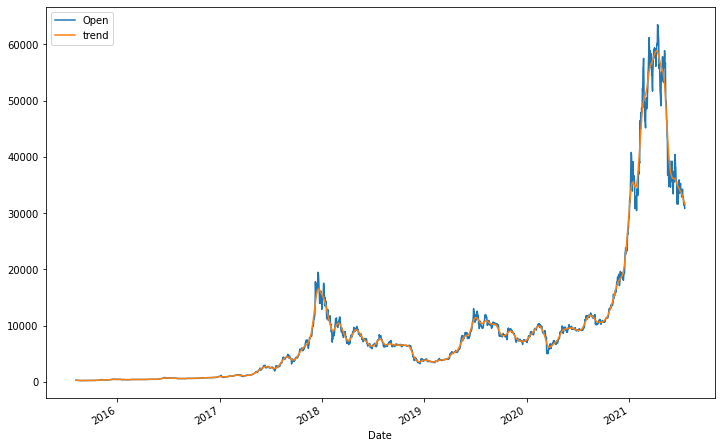

In [53]:
BTC[['Open', 'trend']].plot(figsize = (12, 8))

<AxesSubplot:xlabel='Date'>

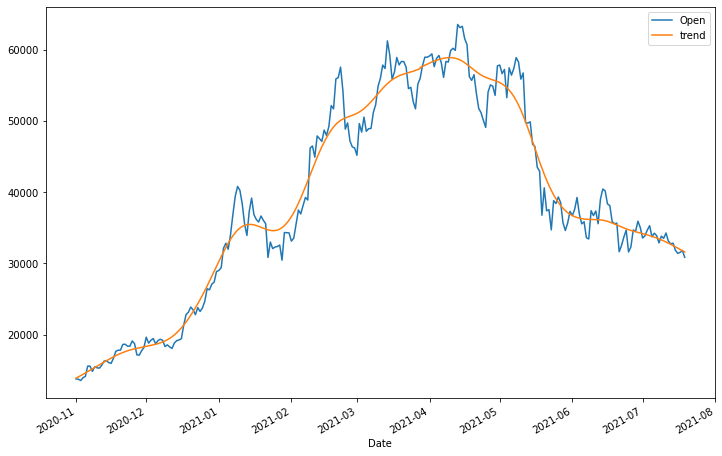

In [54]:
BTC[['Open', 'trend']]["2020-11":].plot(figsize = (12, 8))

In [55]:
#SMA
#Simple Moving Average

In [56]:
BTC['6-month-SMA'] = BTC['Open'].rolling(window = 6).mean()
BTC['12-month-SMA'] = BTC['Open'].rolling(window = 12).mean()

<AxesSubplot:xlabel='Date'>

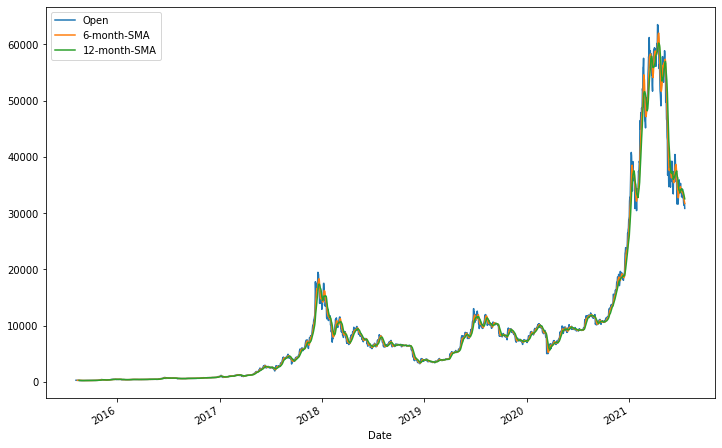

In [57]:
BTC[['Open', '6-month-SMA', '12-month-SMA']].plot(figsize = (12, 8))

<AxesSubplot:xlabel='Date'>

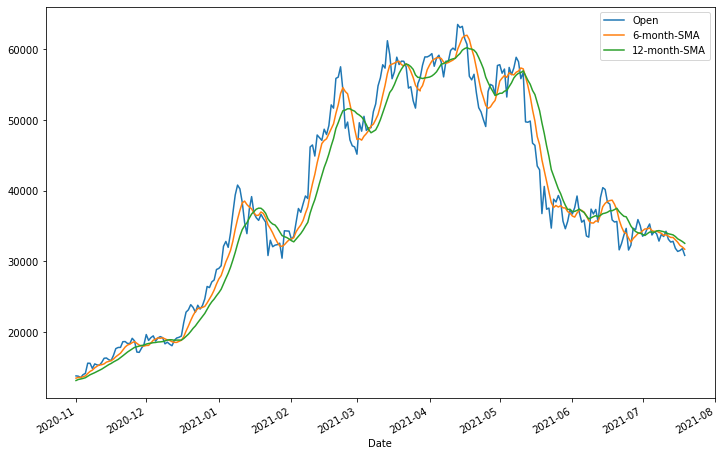

In [58]:
BTC[['Open', '6-month-SMA', '12-month-SMA']]["2020-11":].plot(figsize = (12, 8))

In [59]:
#EWMA
#Exponentially-weighted moving average

In [60]:
BTC['EWMA12'] = BTC['Open'].ewm(span=12).mean()

<AxesSubplot:xlabel='Date'>

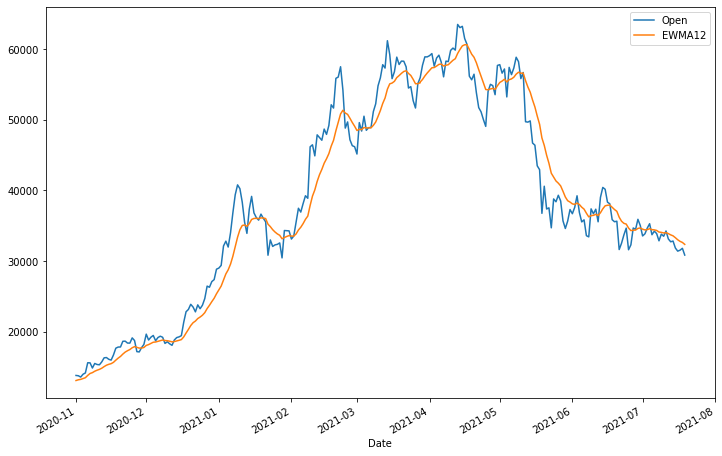

In [61]:
BTC[['Open','EWMA12']]["2020-11":].plot(figsize = (12, 8))

In [62]:
#ETS

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

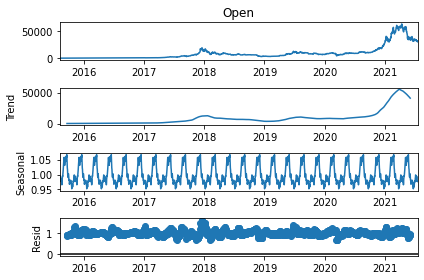

In [64]:
result = seasonal_decompose(BTC['Open'], model = 'multiplicative', period = 90)
fig = result.plot()

In [65]:
#Testing for Stationarity

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
result = adfuller(BTC['Open'])

In [68]:
result

(-0.9438889680197369,
 0.7731759135103773,
 25,
 2145,
 {'1%': -3.4334022810746956,
  '5%': -2.862888383494258,
  '10%': -2.567487813313338},
 33995.42417497627)

In [69]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('>>Augmented Dickey-Fuller Test<<')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [70]:
adf_check(BTC['Open'])

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -0.9438889680197369
p-value : 0.7731759135103773
#Lags Used : 25
Number of Observations Used : 2145
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [71]:
BTC['Open Price First Difference'] = BTC['Open'] - BTC['Open'].shift(1)

In [72]:
adf_check(BTC['Open Price First Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -7.885386331022031
p-value : 4.58450681358315e-12
#Lags Used : 26
Number of Observations Used : 2143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

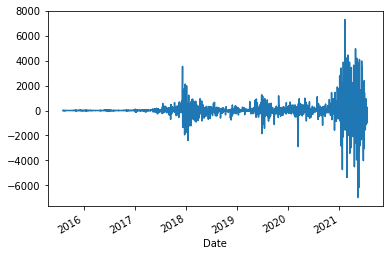

In [73]:
BTC['Open Price First Difference'].plot()

In [74]:
BTC['Open Price Second Difference'] = BTC['Open Price First Difference'] - BTC['Open Price First Difference'].shift(1)

In [75]:
adf_check(BTC['Open Price Second Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -17.95031172055146
p-value : 2.8401497517902472e-30
#Lags Used : 26
Number of Observations Used : 2142
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

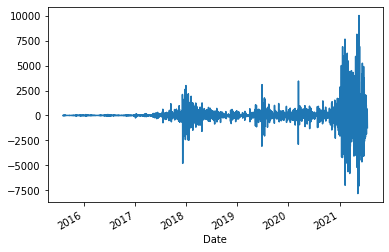

In [76]:
BTC['Open Price Second Difference'].plot()

<AxesSubplot:xlabel='Date'>

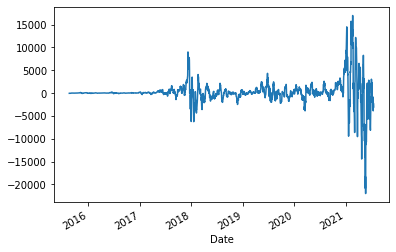

In [77]:
BTC['Seasonal Difference'] = BTC['Open'] - BTC['Open'].shift(12)
BTC['Seasonal Difference'].plot()

In [78]:
# Seasonal Difference by itself was not enough!
adf_check(BTC['Seasonal Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -4.982109399190475
p-value : 2.407547096649589e-05
#Lags Used : 26
Number of Observations Used : 2132
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

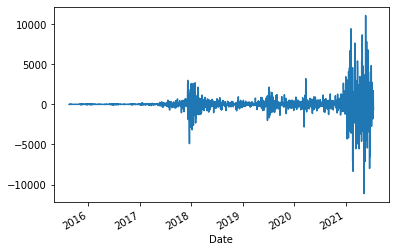

In [79]:
# You can also do seasonal first difference
BTC['Seasonal First Difference'] = BTC['Open Price First Difference'] - BTC['Open Price First Difference'].shift(12)
BTC['Seasonal First Difference'].plot()

In [80]:
adf_check(BTC['Seasonal First Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -16.822268858902053
p-value : 1.1757098139175853e-29
#Lags Used : 25
Number of Observations Used : 2132
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [81]:
#Autocorrelation and Partial Autocorrelation Plots

In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

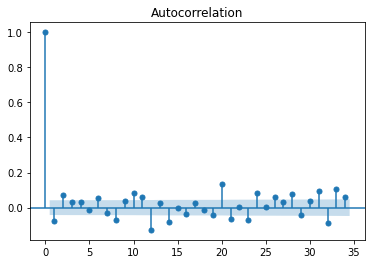

In [83]:
fig_first = plot_acf(BTC["Open Price First Difference"].dropna())

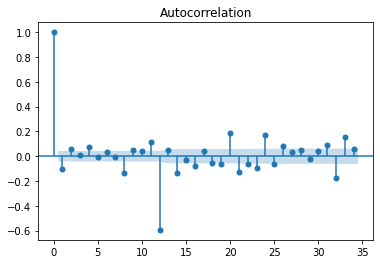

In [84]:
fig_seasonal_first = plot_acf(BTC["Seasonal First Difference"].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

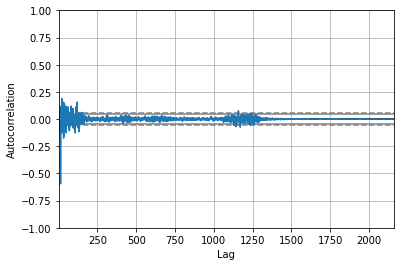

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(BTC['Seasonal First Difference'].dropna())

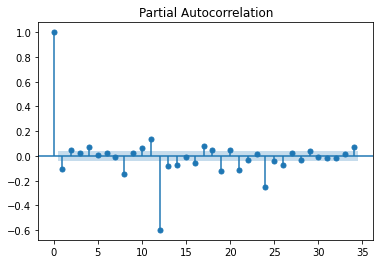

In [86]:
result = plot_pacf(BTC["Seasonal First Difference"].dropna())

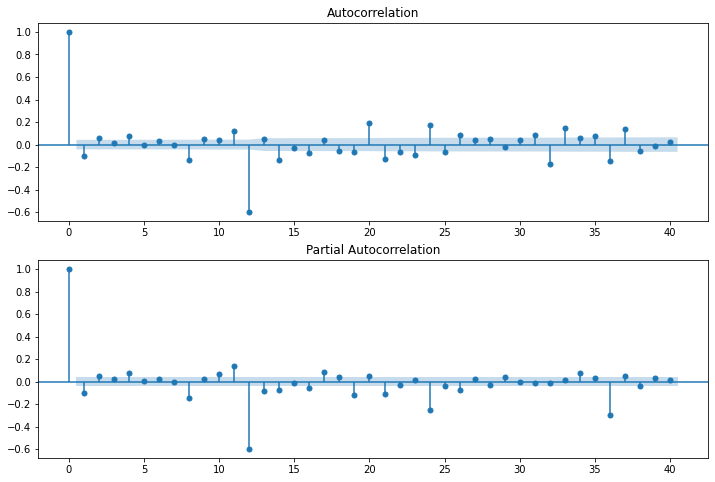

In [87]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(BTC['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(BTC['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [88]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [89]:
# We have seasonal data!
model = ARIMA(BTC['Open'], order=(1, 1, 0)) 
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 2170
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -17265.871
Method:                       css-mle   S.D. of innovations            690.684
Date:                Mon, 26 Jul 2021   AIC                          34537.742
Time:                        02:41:19   BIC                          34554.789
Sample:                             1   HQIC                         34543.975
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.0828     13.807      1.020      0.308     -12.979      41.144
ar.L1.D.Open    -0.0739      0.021     -3.451      0.001      -0.116      -0.032
                                    Roots   

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

<AxesSubplot:xlabel='Date'>

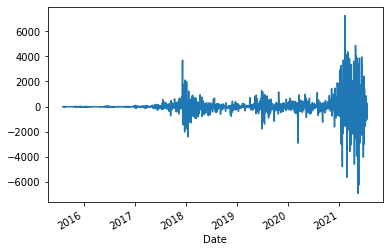

In [90]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

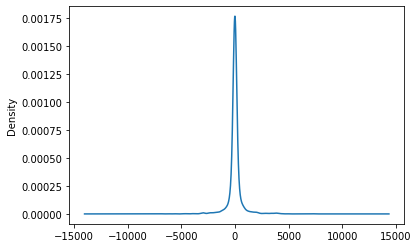

In [91]:
results.resid.plot(kind='kde')

<AxesSubplot:xlabel='Date'>

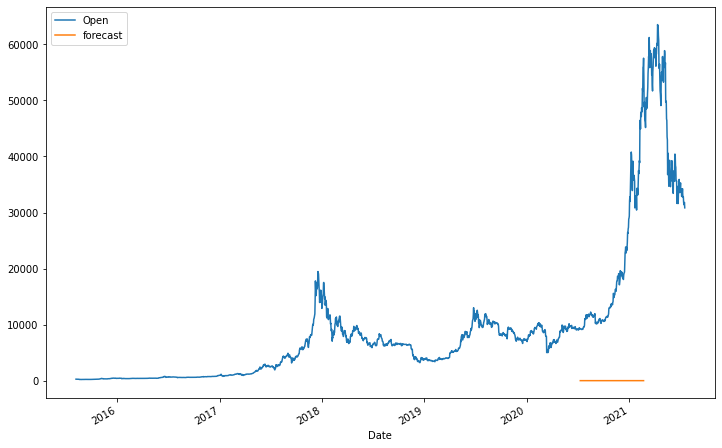

In [92]:
BTC['forecast'] = results.predict(start = 1800, end= 2022, dynamic= True)  
BTC[['Open','forecast']].plot(figsize=(12,8))

In [93]:
btc = BTC[['High', 'Low', 'Open', 'Close']]

In [94]:
btc_month = btc.resample('M').mean()

Dickey–Fuller test: p=0.997664


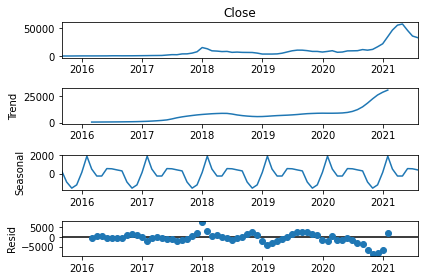

In [95]:
seasonal_decompose(btc_month.Close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.Close)[1])
plt.show()

In [96]:
from scipy import stats
# Box-Cox Transformations
btc_month['Close_box'], lmbda = stats.boxcox(btc_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.Close_box)[1])

Dickey–Fuller test: p=0.629026


In [97]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_12'] = btc_month.Close_box - btc_month.Close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.232410


In [98]:
# Seasonal differentiation (3 months)
btc_month['box_diff_seasonal_3'] = btc_month.Close_box - btc_month.Close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.020196


Dickey–Fuller test: p=0.000060


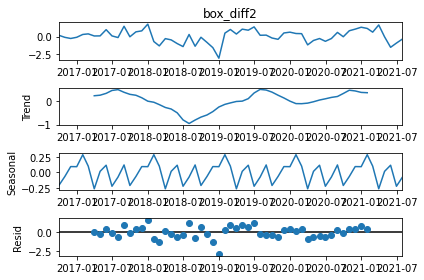

In [99]:
# Regular differentiation
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

plt.show()

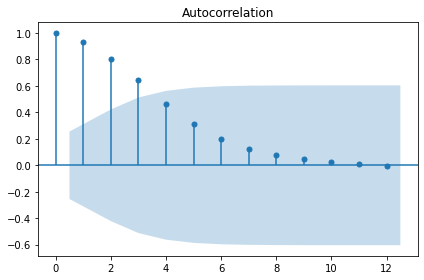

In [100]:
#autocorrelation_plot(btc_month.close)
plot_acf(btc_month.Close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

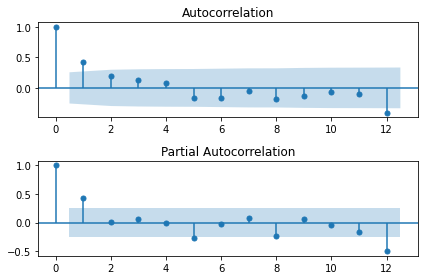

In [101]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

In [102]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.Close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [103]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
3     (1, 0)  119.190312
4     (1, 1)  121.179938
6     (2, 0)  121.182917
1     (0, 1)  121.394266
7     (2, 1)  121.604024


In [104]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Close_box   No. Observations:                   72
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -57.595
Date:                Mon, 26 Jul 2021   AIC                            119.190
Time:                        02:41:35   BIC                            123.716
Sample:                    08-31-2015   HQIC                           120.990
                         - 07-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4534      0.073      6.218      0.000       0.310       0.596
sigma2         0.2956      0.044      6.729      0.000       0.210       0.382
Ljung-Box (L1) (Q):                   0.08   Jarque-

In [105]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


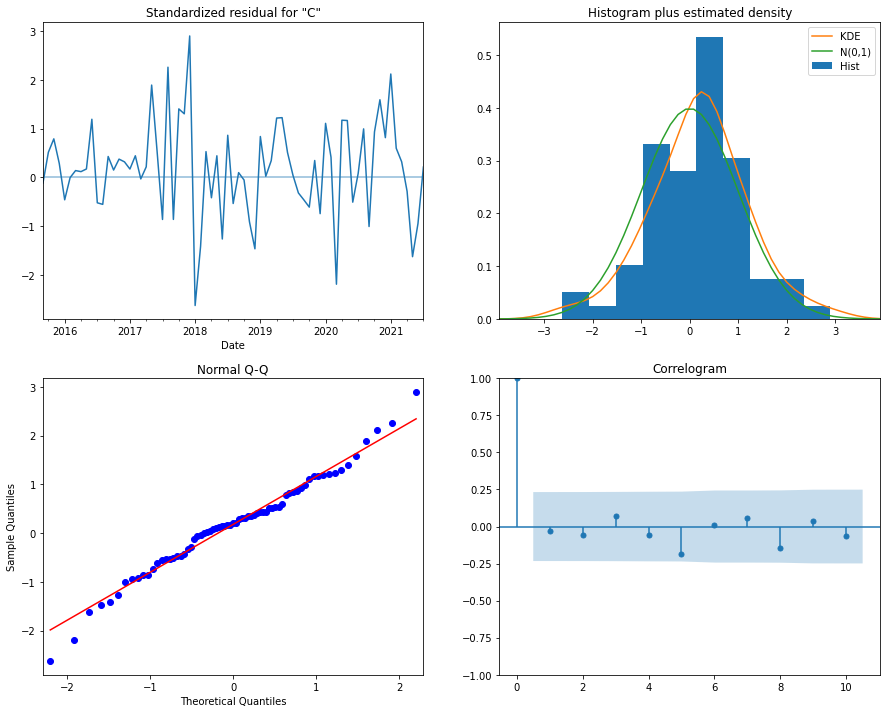

In [106]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [107]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

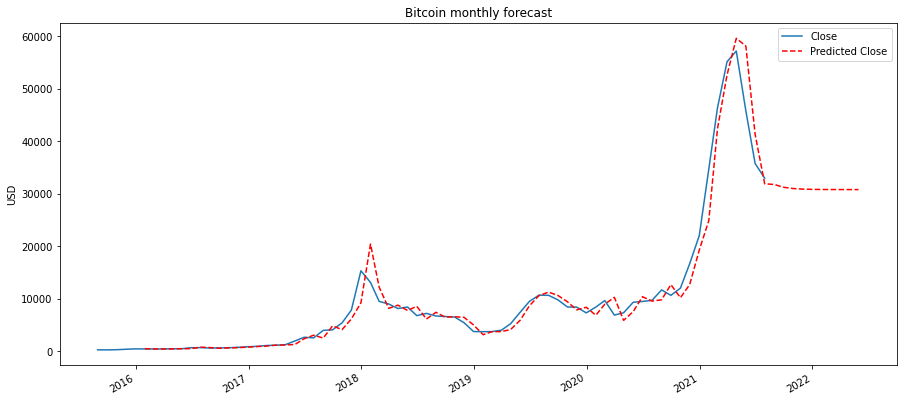

In [108]:
from datetime import datetime, timedelta

# Prediction
btc_month_pred = btc_month[['Close']]
date_list = [datetime(2021, 7, 31), datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31), datetime(2022, 1, 31), datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2022, 4, 30), datetime(2022, 5, 31)]

future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2016, 1, 31), end=datetime(2022, 5, 31)), lmbda)


plt.figure(figsize=(15,7))
btc_month_pred.Close.plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')
plt.show()

In [109]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.Close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [110]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  127.071034
7   (0, 1, 0, 1)  127.885531
25  (1, 1, 0, 1)  129.018977
37  (2, 0, 0, 1)  129.032010
21  (1, 0, 1, 1)  129.053572
                                      SARIMAX Results                                      
Dep. Variable:                           Close_box   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 4)   Log Likelihood                 -60.536
Date:                             Mon, 26 Jul 2021   AIC                            127.071
Time:                                     02:41:43   BIC                            133.685
Sample:                                 08-31-2015   HQIC                           129.688
                                      - 07-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

In [111]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


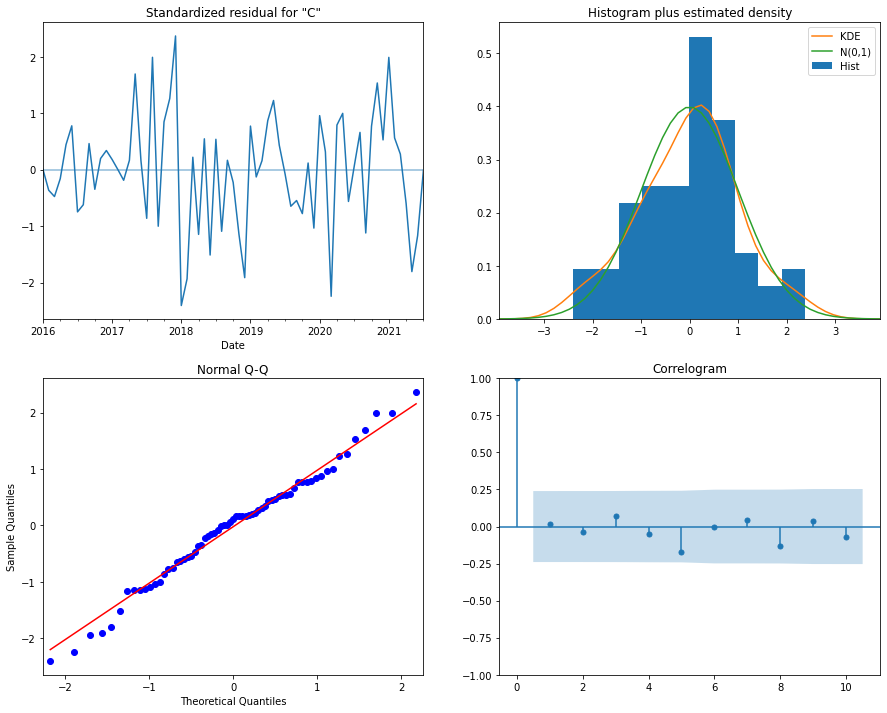

In [112]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000000


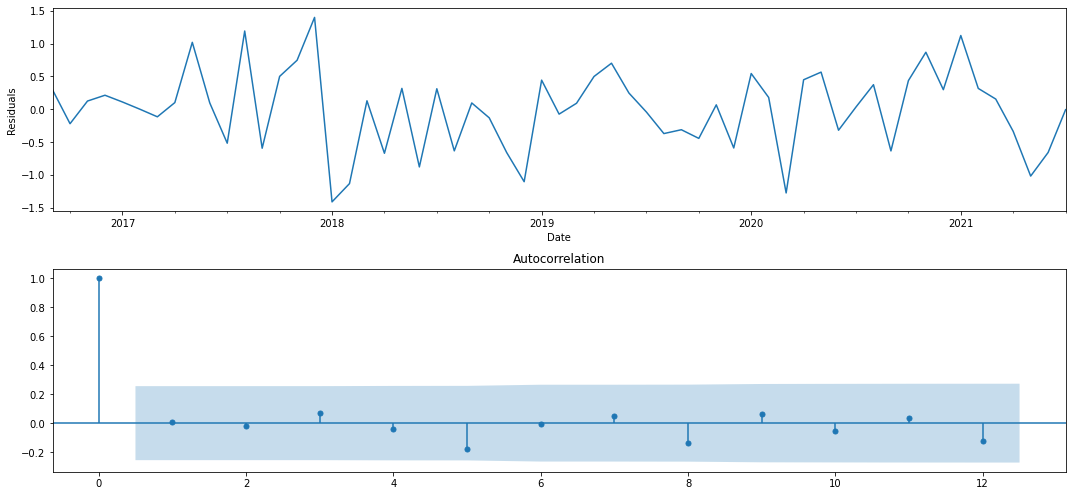

In [113]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
#sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

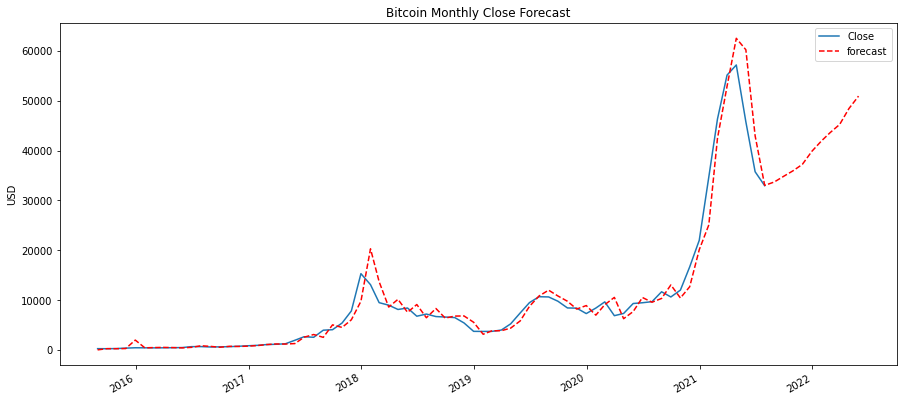

In [114]:
# Prediction
btc_month2 = btc_month[['Close']]
date_list = [datetime(2021, 7, 31), datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31), datetime(2022, 1, 31), datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2022, 4, 30), datetime(2022, 5, 31),]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month2 = pd.concat([btc_month2, future])

btc_month2['forecast'] = invboxcox(best_model.predict(start=0, end=100), lmbda)

plt.figure(figsize=(15,7))
btc_month2.Close.plot()
btc_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.savefig('bitcoin_monthly_forecast.png')
plt.show()

In [115]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2019-01-01':'2021-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)))

Mean Squared Error: 1604.32
